## instructions

to download files, use `scp /home/lspiegel/tuplex-public/tuplex/build/stats/*.json <dest-dir>`

In [67]:
import pandas as pd
import json
import glob

In [68]:
!ls -l ../data/json_stats/ | wc -l

     121


In [69]:
rows = []
for path in glob.glob('../data/json_stats/*.json'):
    with open(path, 'r') as fp:
        rows.append(json.load(fp))

In [70]:
df = pd.DataFrame(rows)

In [71]:
# print some global stats
n_unique_general_case = len(df['general_case_type'].unique())
n_unique_normal_case = len(df['normal_case_type'].unique())

print('{}\tunique general case types\n{}\t'
'unique normal case types\n{}\tfiles'.format(n_unique_general_case, n_unique_normal_case, len(df)))

14	unique general case types
2	unique normal case types
120	files


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
# plot out normal/general/fallback case distribution

In [74]:
df= df.sort_values(by='nrows')

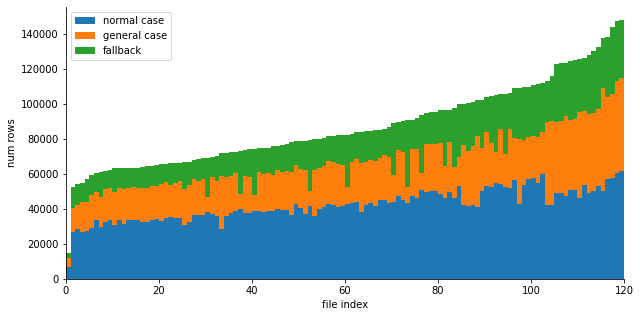

In [75]:
plt.figure(figsize=(10, 5))
xq = np.arange(len(df)) + .5
plt.bar(xq, df['normal_case_path_count'], width=1, linewidth=0, label='normal case')
plt.bar(xq, df['general_case_path_count'], width=1, linewidth=0,
        bottom=df['normal_case_path_count'], label='general case')
plt.bar(xq, df['fallback_case_path_count'], width=1, linewidth=0,
        bottom=df['normal_case_path_count'] + df['general_case_path_count'],
       label='fallback')
plt.ylabel('num rows')
plt.xlabel('file index')
plt.xlim(0, len(df))
plt.legend()
sns.despine()

In [79]:
df.head().iloc[0]['normal_case_type']

"Struct[(str,'id'->str),(str,'type'->str),(str,'actor'->Struct[(str,'id'->i64),(str,'login'->str),(str,'display_login'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'avatar_url'->str)]),(str,'repo'->Struct[(str,'id'->i64),(str,'name'->str),(str,'url'->str)]),(str,'payload'->Struct[(str,'push_id'->i64),(str,'size'->i64),(str,'distinct_size'->i64),(str,'ref'->str),(str,'head'->str),(str,'before'->str),(str,'commits'->List[Struct[(str,'sha'->str),(str,'author'->Struct[(str,'name'->str),(str,'email'->str)]),(str,'message'->str),(str,'distinct'->boolean),(str,'url'->str)]])]),(str,'public'->boolean),(str,'created_at'->str)]"

In [80]:
df.head().iloc[0]['general_case_type']

"Struct[(str,'actor'->Struct[(str,'id'->i64),(str,'login'->str),(str,'display_login'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'avatar_url'->str)]),(str,'created_at'->str),(str,'id'->str),(str,'org'=>Struct[(str,'id'->i64),(str,'login'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'avatar_url'->str)]),(str,'payload'->Struct[(str,'action'=>str),(str,'before'=>str),(str,'commits'=>List[Struct[(str,'sha'->str),(str,'author'->Struct[(str,'name'->str),(str,'email'->str)]),(str,'message'->str),(str,'distinct'->boolean),(str,'url'->str)]]),(str,'description'=>Option[str]),(str,'distinct_size'=>i64),(str,'head'=>str),(str,'master_branch'=>str),(str,'push_id'=>i64),(str,'pusher_type'=>str),(str,'ref'=>Option[str]),(str,'ref_type'=>str),(str,'size'=>i64)]),(str,'public'->boolean),(str,'repo'->Struct[(str,'id'->i64),(str,'name'->str),(str,'url'->str)]),(str,'type'->str)]"

In [86]:
sorted(list(df['general_case_type'].unique()), key=lambda x: len(x))[0]

"Struct[(str,'actor'->Struct[(str,'id'->i64),(str,'login'->str),(str,'display_login'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'avatar_url'->str)]),(str,'created_at'->str),(str,'id'->str),(str,'org'=>Struct[(str,'id'->i64),(str,'login'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'avatar_url'->str)]),(str,'payload'->Struct[(str,'push_id'->i64),(str,'size'->i64),(str,'distinct_size'->i64),(str,'ref'->str),(str,'head'->str),(str,'before'->str),(str,'commits'->List[Struct[(str,'sha'->str),(str,'author'->Struct[(str,'email'->str),(str,'name'->str)]),(str,'message'->str),(str,'distinct'->boolean),(str,'url'->str)]])]),(str,'public'->boolean),(str,'repo'->Struct[(str,'id'->i64),(str,'name'->str),(str,'url'->str)]),(str,'type'->str)]"

In [85]:
sorted(list(df['general_case_type'].unique()), key=lambda x: len(x))[::-1][0]

"Struct[(str,'actor'->Struct[(str,'id'->i64),(str,'login'->str),(str,'display_login'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'avatar_url'->str)]),(str,'created_at'->str),(str,'id'->str),(str,'org'=>Struct[(str,'id'->i64),(str,'login'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'avatar_url'->str)]),(str,'payload'->Struct[(str,'action'=>str),(str,'before'=>str),(str,'comment'=>Struct[(str,'url'->str),(str,'html_url'->str),(str,'issue_url'->str),(str,'id'->i64),(str,'node_id'->str),(str,'user'->Struct[(str,'login'->str),(str,'id'->i64),(str,'node_id'->str),(str,'avatar_url'->str),(str,'gravatar_id'->str),(str,'url'->str),(str,'html_url'->str),(str,'followers_url'->str),(str,'following_url'->str),(str,'gists_url'->str),(str,'starred_url'->str),(str,'subscriptions_url'->str),(str,'organizations_url'->str),(str,'repos_url'->str),(str,'events_url'->str),(str,'received_events_url'->str),(str,'type'->str),(str,'site_admin'->boolean)]),(str,'created_at'->str),(str,'updated_

TODO: If we computed a global general case, this would mean either everything was optional or highly likely optional, but also often we can't create this global general case becuase of the type mismatch since Tuplex has only Optional[ ] types as polymoprhic types.

TODO: add to stats sample rows (100x ?) that match normal/general case/fallback case.

TODO: add pretty print for nested struct type.

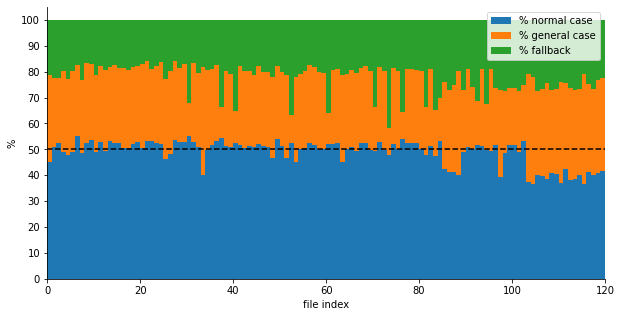

In [76]:
# same figure, but this time with percent
plt.figure(figsize=(10, 5))
xq = np.arange(len(df)) + .5
nrows = df['nrows'] * 0.01
plt.bar(xq, df['normal_case_path_count'] / nrows,
        width=1, linewidth=0, label='% normal case')
plt.bar(xq, df['general_case_path_count'] / nrows, label='% general case',
        width=1, linewidth=0, bottom=df['normal_case_path_count'] / nrows)
plt.bar(xq, df['fallback_case_path_count'] / nrows,
        width=1, linewidth=0, label='% fallback',
        bottom=df['normal_case_path_count'] / nrows + df['general_case_path_count'] / nrows)
plt.ylabel('%')
plt.xlabel('file index')
plt.axhline(50, color='k', linestyle='--')
plt.yticks(np.arange(0, 110, 10))
plt.xlim(0, len(df))
plt.legend()
sns.despine()

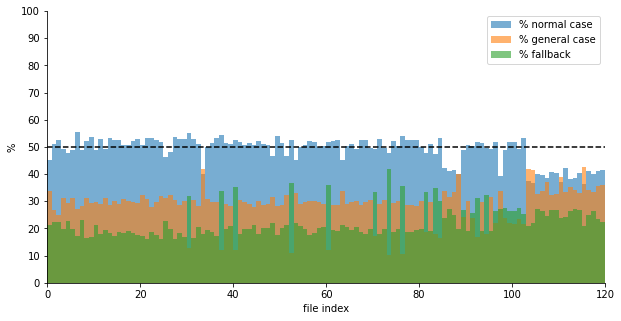

In [77]:
# same figure, but this time with percent
plt.figure(figsize=(10, 5))
xq = np.arange(len(df)) + .5
nrows = df['nrows'] * 0.01
alpha=.6
plt.bar(xq, df['normal_case_path_count'] / nrows,
        width=1, linewidth=0, label='% normal case', alpha=alpha)
plt.bar(xq, df['general_case_path_count'] / nrows, label='% general case',
        width=1, linewidth=0, alpha=alpha)
plt.bar(xq, df['fallback_case_path_count'] / nrows,
        width=1, linewidth=0, label='% fallback', alpha=alpha)
plt.ylabel('%')
plt.xlabel('file index')
plt.axhline(50, color='k', linestyle='--')
plt.yticks(np.arange(0, 110, 10))
plt.xlim(0, len(df))
plt.legend()
sns.despine()

Next steps:
--> make pushdown work. Also the idea with the filter (i.e., filter after event type (PushEvent?))

--> UDF should actually then check on the type (i.e. list or int). => requires adding `isinstance`